In [30]:
!pip install tensorflow

In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv("C:/Users/prama/OneDrive/Desktop/datasets/merged_dataset.csv")
df.head()

,Text,Language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [4]:
# General information about the dataset
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32337 entries, 0 to 32336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      32337 non-null  object
 1   Language  32337 non-null  object
dtypes: object(2)
memory usage: 505.4+ KB


In [5]:
# Summary statistics for numerical columns (if any)
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                                                     Text Language
count                                               32337    32337
unique                                              32126       30
top     haec commentatio automatice praeparata res ast...  English
freq                                                   48     2385


In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Text        0
Language    0
dtype: int64


In [7]:
# Check for duplicate rows
print("\nDuplicate Rows Count:", df.duplicated().sum())


Duplicate Rows Count: 207


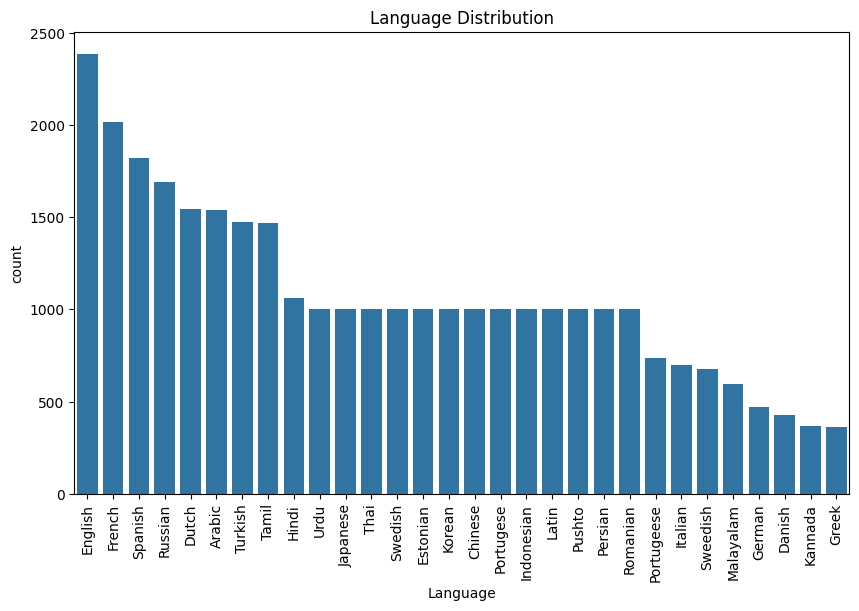

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Language', order=df['Language'].value_counts().index)
plt.title('Language Distribution')
plt.xticks(rotation=90)
plt.show()

In [9]:
# Count of missing values before handling
print("\nMissing Values Before Handling:")
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()

# Count of missing values after handling
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values Before Handling:
Text        0
Language    0
dtype: int64

Missing Values After Handling:
Text        0
Language    0
dtype: int64


In [10]:
# Count duplicates before handling
print("\nDuplicate Rows Before Handling:", df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()

# Count duplicates after handling
print("\nDuplicate Rows After Handling:", df.duplicated().sum())


Duplicate Rows Before Handling: 207

Duplicate Rows After Handling: 0


In [11]:
import re

# Function to clean text
def clean_text(text):
    # Remove backslashes, line breaks, and extra whitespaces
    text = re.sub(r'\\', '', text)       # Remove backslashes
    text = re.sub(r'\n', ' ', text)      # Replace line breaks with a space
    text = re.sub(r'\s+', ' ', text)     # Replace multiple spaces with a single space
    
    # Remove special characters except for non-English text
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)      # Remove numbers

    # Remove leading and trailing whitespaces
    text = text.strip()
    
    return text

# Apply text cleaning to the 'Text' column
df['Cleaned_Text'] = df['Text'].apply(clean_text)

# Convert text to lowercase
df['Cleaned_Text'] = df['Cleaned_Text'].str.lower()


In [12]:
print("\nInitial Dataset:")
print(df[['Text', 'Language']].head())  # Original dataset snapshot

print("\nAfter Preprocessing:")
print(df[['Cleaned_Text', 'Language']].head())  # Preprocessed dataset snapshot


Initial Dataset:
                                                Text  Language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch

After Preprocessing:
                                        Cleaned_Text  Language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas på eng the jesuits...   Swedish
2  ถนนเจรญกรง อกษรโรมน thanon charoen krung เรมตง...      Thai
3  வசகபபடடனம தமழசசஙகதத இநதப பததரகவசகபபடடன ஆசரயர ச...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch


In [13]:
# Display rows 21861 to 32132 
subset = df[21861:32132]
print(subset)

                                                    Text Language  \
22002  The study of nature is a large, if not the onl...  English   
22003  Although humans are part of nature, human acti...  English   
22004  [1] The word nature is borrowed from the Old F...  English   
22005  [2] In ancient philosophy, natura is mostly us...  English   
22006  [3][4] \nThe concept of nature as a whole, the...  English   
...                                                  ...      ...   
32332  ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...  Kannada   
32333  ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...  Kannada   
32334  ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...  Kannada   
32335  ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...  Kannada   
32336  ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...  Kannada   

                                            Cleaned_Text  
22002  the study of nature is a large if not the only...  
22003  although humans are part of nature human activ

In [14]:
print("\nInitial Dataset:")
print(subset[['Text', 'Language']].head())  # Original dataset snapshot

print("\nAfter Preprocessing:")
print(subset[['Cleaned_Text', 'Language']].head())  # Preprocessed dataset snapshot


Initial Dataset:
                                                    Text Language
22002  The study of nature is a large, if not the onl...  English
22003  Although humans are part of nature, human acti...  English
22004  [1] The word nature is borrowed from the Old F...  English
22005  [2] In ancient philosophy, natura is mostly us...  English
22006  [3][4] \nThe concept of nature as a whole, the...  English

After Preprocessing:
                                            Cleaned_Text Language
22002  the study of nature is a large if not the only...  English
22003  although humans are part of nature human activ...  English
22004  the word nature is borrowed from the old frenc...  English
22005  in ancient philosophy natura is mostly used as...  English
22006  the concept of nature as a whole the physical ...  English


In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Language_Label'] = le.fit_transform(df['Language'])

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [17]:
#Split the data into training and testing sets
X = df['Cleaned_Text']  # Features (cleaned text)
y = df['Language']      # Labels (languages)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize the Tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")  # Adjust num_words if needed
tokenizer.fit_on_texts(x_train)  # Fit the tokenizer on training data

# Convert text to sequences
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

# Apply padding to sequences
max_length = 100 
x_train_padded = pad_sequences(x_train_seq, maxlen=max_length, padding='post', truncating='post')
x_test_padded = pad_sequences(x_test_seq, maxlen=max_length, padding='post', truncating='post')

# Check vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print(f"Vocabulary Size: {vocab_size}")

# Print examples of tokenized and padded sequences
print("Example of Tokenized Sequence (Train):", x_train_seq[:1])
print("Example of Padded Sequence (Train):", x_train_padded[:1])
print("Example of Tokenized Sequence (Test):", x_test_seq[:1])
print("Example of Padded Sequence (Test):", x_test_padded[:1])


Vocabulary Size: 250937
Example of Tokenized Sequence (Train): [[246, 1715, 1, 3553, 776, 7328, 1, 1, 7880, 1, 7880, 175, 176, 28, 1, 7881, 1, 51, 3403, 1, 1, 2, 1059, 75, 1235, 2, 1, 1, 7880, 1, 51, 227, 176, 3553, 776, 7328, 246, 2975]]
Example of Padded Sequence (Train): [[ 246 1715    1 3553  776 7328    1    1 7880    1 7880  175  176   28
     1 7881    1   51 3403    1    1    2 1059   75 1235    2    1    1
  7880    1   51  227  176 3553  776 7328  246 2975    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]]
Example of Tokenized Sequence (Test): [[1, 1]]
Example of Padded Sequence (Test): [[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

In [20]:
# Define the number of classes (unique languages in the dataset)
num_classes = len(set(y_train))

# Define the model
model = Sequential([
    # Embedding layer
    Embedding(input_dim=vocab_size, output_dim=128),  # Removed input_length
    
    # LSTM layers
    LSTM(128, return_sequences=True),
    Dropout(0.4),
    LSTM(64),
    
    # Dense layers
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer for multi-class classification
])


In [21]:
Embedding(input_dim=vocab_size, output_dim=128)


<Embedding name=embedding, built=False>

In [22]:
LSTM(256, return_sequences=True)
LSTM(128)


<LSTM name=lstm_1, built=False>

In [23]:
Dropout(0.5)


<Dropout name=dropout, built=True>

In [24]:
print(x_train_padded.dtype)  # Should be numeric, e.g., int32 or float32
print(y_train.dtype)         # Should be numeric, e.g., int32


int32
object


In [25]:
import numpy as np

x_train_padded = np.array(x_train_padded, dtype=np.int32)
x_test_padded = np.array(x_test_padded, dtype=np.int32)


In [26]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform labels
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)  # Use transform, not fit_transform, for consistency

# Check the mapping
print("Label Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


Label Mapping: {'Arabic': np.int64(0), 'Chinese': np.int64(1), 'Danish': np.int64(2), 'Dutch': np.int64(3), 'English': np.int64(4), 'Estonian': np.int64(5), 'French': np.int64(6), 'German': np.int64(7), 'Greek': np.int64(8), 'Hindi': np.int64(9), 'Indonesian': np.int64(10), 'Italian': np.int64(11), 'Japanese': np.int64(12), 'Kannada': np.int64(13), 'Korean': np.int64(14), 'Latin': np.int64(15), 'Malayalam': np.int64(16), 'Persian': np.int64(17), 'Portugeese': np.int64(18), 'Portugese': np.int64(19), 'Pushto': np.int64(20), 'Romanian': np.int64(21), 'Russian': np.int64(22), 'Spanish': np.int64(23), 'Swedish': np.int64(24), 'Sweedish': np.int64(25), 'Tamil': np.int64(26), 'Thai': np.int64(27), 'Turkish': np.int64(28), 'Urdu': np.int64(29)}


In [27]:
import numpy as np

y_train = np.array(y_train, dtype=np.int32)
y_test = np.array(y_test, dtype=np.int32)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128),
    LSTM(128, return_sequences=True),
    Dropout(0.4),
    LSTM(64),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')  # Adjust `num_classes` to the number of unique labels
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(x_train_padded, y_train, epochs=20, batch_size=32, 
                    validation_data=(x_test_padded, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(x_test_padded, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 334s 404ms/step - accuracy: 0.0919 - loss: 3.2254 - val_accuracy: 0.1243 - val_loss: 3.0570
Epoch 2/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 338s 420ms/step - accuracy: 0.1172 - loss: 3.0189 - val_accuracy: 0.1335 - val_loss: 2.9898
Epoch 3/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 305s 380ms/step - accuracy: 0.1360 - loss: 2.9357 - val_accuracy: 0.1259 - val_loss: 2.9716
Epoch 4/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 306s 380ms/step - accuracy: 0.1879 - loss: 2.5540 - val_accuracy: 0.2077 - val_loss: 2.6167
Epoch 5/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 303s 376ms/step - accuracy: 0.2358 - loss: 2.3801 - val_accuracy: 0.3469 - val_loss: 1.9809
Epoch 6/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 324s 403ms/step - accuracy: 0.3732 - loss: 1.8190 - val_accuracy: 0.4186 - val_loss: 1.7543
Epoch 7/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 332s 412ms/step - accuracy: 0.2173 - loss: 2.6300 - val_accuracy: 0.2613 - val_loss: 2.5007
Epoch 8/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 332s 413ms/step - accuracy: 0.3471 -

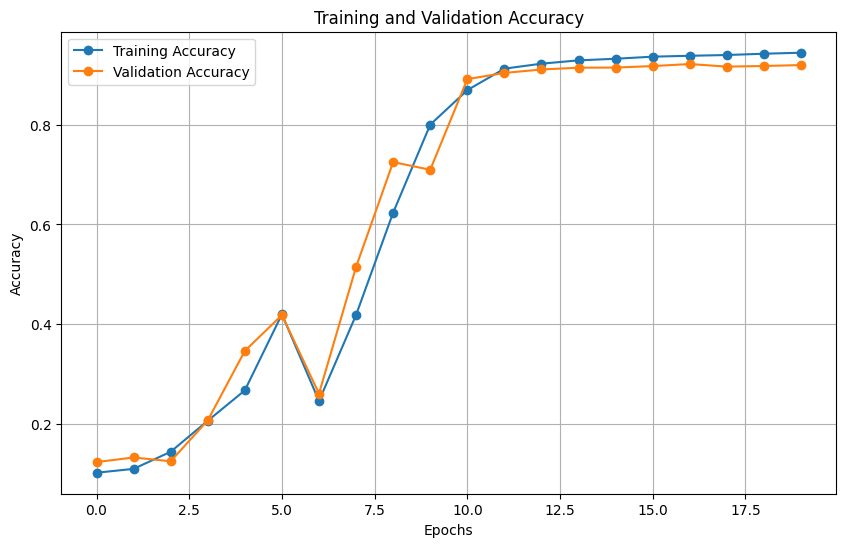

In [34]:
import matplotlib.pyplot as plt

# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


GRU Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Starting GRU model training...

Epoch 1/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 224s 267ms/step - accuracy: 0.1262 - loss: 3.0298 - val_accuracy: 0.5269 - val_loss: 1.4750
Epoch 2/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 214s 266ms/step - accuracy: 0.6139 - loss: 1.2261 - val_accuracy: 0.8540 - val_loss: 0.5317
Epoch 3/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 210s 262ms/step - accuracy: 0.8657 - loss: 0.4849 - val_accuracy: 0.8970 - val_loss: 0.3848
Epoch 4/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 205s 255ms/step - accuracy: 0.9168 - loss: 0.2966 - val_accuracy: 0.9048 - val_loss: 0.3411
Epoch 5/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 246s 306ms/step - accuracy: 0.9275 - loss: 0.2373 - val_accuracy: 0.9080 - val_loss: 0.3325
Epoch 6/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 214s 266ms/step - accuracy: 0.9342 - loss: 0.2111 - val_accuracy: 0.9097 - val_loss: 0.3261
Epoch 7/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 213s 265ms/step - accuracy: 0.9376 - loss: 0.1843 - val_accuracy: 0.9102 - val_loss: 0.3380
Epoch 8/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 214

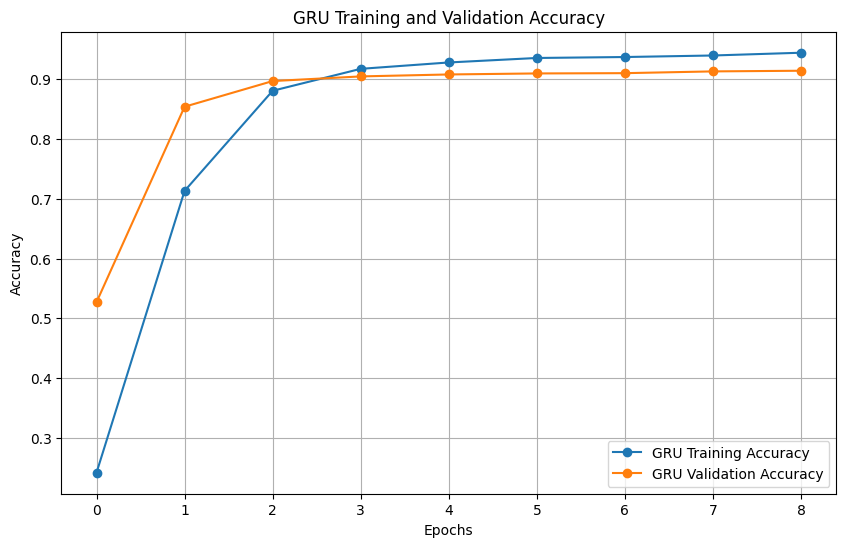

GRU Test Accuracy: 90.97%


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout

# Define the GRU model
gru_model = Sequential([
    # Embedding layer
    Embedding(input_dim=vocab_size, output_dim=64),

    # GRU layers
    GRU(128, return_sequences=True),
    Dropout(0.3),
    GRU(64),

    # Dense layers
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer for multi-class classification
])

# Compile the GRU model
gru_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the GRU model summary
print("GRU Model Summary:")
gru_model.summary()

# Train the GRU model
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
print("\nStarting GRU model training...\n")
gru_history = gru_model.fit(
    x_train_padded, 
    y_train, 
    epochs=10, 
    batch_size=32, 
    validation_data=(x_test_padded, y_test), 
    callbacks=[early_stopping]
)

# Evaluate the GRU model
loss, gru_accuracy = gru_model.evaluate(x_test_padded, y_test, verbose=0)
print(f"GRU Test Accuracy: {gru_accuracy * 100:.2f}%")

# Plot Training and Validation Accuracy for GRU
plt.figure(figsize=(10, 6))
plt.plot(gru_history.history['accuracy'], label='GRU Training Accuracy', marker='o')
plt.plot(gru_history.history['val_accuracy'], label='GRU Validation Accuracy', marker='o')
plt.title('GRU Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

print(f"GRU Test Accuracy: {gru_accuracy * 100:.2f}%")
